In [1]:
import numpy as np

In [2]:
volume = np.ones((4,4,4), dtype=int)
volume[1:3, 1:3, 1] = 0
volume[1:3, 1:3, 2] = 2

In [3]:
neighbours_dict = {}
for x, y, z in ((a,b,c) for a in range(3) for b in range(3) for c in range(3)):
    x_min = (x == 0)
    x_max = (x == 2)
    y_min = (y == 0)
    y_max = (y == 2)
    z_min = (z == 0)
    z_max = (z == 2)
    key = (x_min, x_max, y_min, y_max, z_min, z_max)
    neighbours = []
    if x_min is False: neighbours.append(np.array((-1,0,0), dtype=int))
    if x_max is False: neighbours.append(np.array((1,0,0), dtype=int))
    if y_min is False: neighbours.append(np.array((0,-1,0), dtype=int))
    if y_max is False: neighbours.append(np.array((0,1,0), dtype=int))
    if z_min is False: neighbours.append(np.array((0,0,-1), dtype=int))
    if z_max is False: neighbours.append(np.array((0,0,1), dtype=int))
    neighbours_dict[key] = neighbours

In [4]:
#n_nonzero = np.count_nonzero(volume)
n_nonzero = 4**3
A = np.zeros((n_nonzero, n_nonzero), dtype = np.float32)
b = np.zeros(n_nonzero, dtype = np.float32)

In [19]:
# Volume to A b arrays
i = 0
w = 4 # x axis
h = 4 # y axis
d = 4 # z axis
neighbour_displacement_template = np.array((h*d, d, 1), dtype=int)
for x, y, z in ((a,b,c) for a in range(w) for b in range(h) for c in range(d)):
    coords = np.array((x, y, z))
    center_c = volume[tuple(coords)]

    if center_c == 0:
        A[i,i] = 1
        i += 1
        continue

    x_min = (x == 0)
    x_max = (x == w - 1)
    y_min = (y == 0)
    y_max = (y == h - 1)
    z_min = (z == 0)
    z_max = (z == d - 1)

    key = (x_min, x_max, y_min, y_max, z_min, z_max)
    neighbours = neighbours_dict[key]

    total_c = np.float32(0)

    if z_min:
        total_c += 2 * center_c
        b[i] = -(2 * center_c)
    elif z_max:
        total_c += 2 * center_c

    for neighbour in neighbours:
        neighbour_c = volume[tuple(coords + neighbour)]
        if neighbour_c == 0: continue
        face_c = 2 / (1 / center_c + 1 / neighbour_c)
        total_c += np.float32(face_c)
        neighbour_displacement = (neighbour_displacement_template * neighbour).sum()
        A[i, i + neighbour_displacement] = face_c
    A[i,i] = - total_c

    i += 1


In [20]:
solution = np.linalg.solve(A, b)

In [21]:
pressure_field = np.zeros((4,4,4), dtype=np.float32)
i = 0
for x, y, z in ((a,b,c) for a in range(w) for b in range(h) for c in range(d)):
    pressure_field[x,y,z] = solution[i]
    i += 1

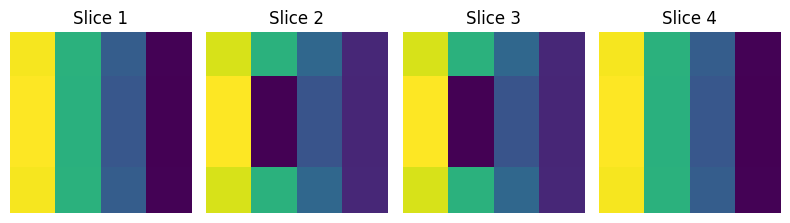

In [22]:
import matplotlib.pyplot as plt

num_slices = pressure_field.shape[2]
fig, axs = plt.subplots(1, 4, figsize=(8, 8))

for i in range(num_slices):
    slice_2d = pressure_field[i, :, :]
    axs[i].imshow(slice_2d, cmap='viridis', origin='upper')
    axs[i].set_title(f'Slice {i + 1}')
    axs[i].axis('off')  # Turn off axis for better visualization

plt.tight_layout()
plt.show()

In [23]:
print("[", end="")
for a in A:
    print("[", end="")
    for aa in a:
        print(aa,",", end="")
    print("],")
print("]")

[[-5.0 ,1.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,],
[1.0 ,-4.0 ,1.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,],
[0.0 ,1.0 ,-4.0 ,1.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,],
[0.0 ,0.0 ,1.0 ,-5.0 ,0.

In [25]:
for bb in b:
    print(bb, ",", end="")

-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,-2.0 ,0.0 ,0.0 ,0.0 ,

In [38]:
# dense matrix to sparse matrix
diag = np.diagonal(A)
diag_nulls_count = np.zeros(diag.shape, dtype=int)
diag_nulls_count[0] = diag[0] > 0
for i in range(1, diag_nulls_count.size):
    diag_nulls_count[i] = diag_nulls_count[i-1] + (diag[i] > 0)
nonzero_n = np.count_nonzero(diag < 0)
val_array = np.zeros(nonzero_n * 6)
col_idx_array = np.zeros(nonzero_n * 6, dtype=int)
row_ptr_array = np.zeros(nonzero_n, dtype=int)
#val_array.resize
condensed_b = np.zeros(nonzero_n)

sparse_i = 0
vals_n = 0

vals_n = 0
for dense_i in range(diag.size):
    if diag[dense_i] > 0:
        continue

    row_ptr_array[sparse_i] = vals_n

    for dense_j in range(diag.size):
        if A[dense_i, dense_j] != 0:
            val_array[vals_n] = A[dense_i, dense_j]
            real_col = dense_j - diag_nulls_count[dense_j]
            col_idx_array[vals_n] = real_col
            condensed_b[sparse_i] = b[dense_i]
            vals_n += 1

    sparse_i += 1
val_array.resize(vals_n)
col_idx_array.resize(vals_n)
vals_n

308

In [39]:
condensed_b

array([-2.,  0.,  0.,  0., -2.,  0.,  0.,  0., -2.,  0.,  0.,  0., -2.,
        0.,  0.,  0., -2.,  0.,  0.,  0., -2.,  0.,  0., -2.,  0.,  0.,
       -2.,  0.,  0.,  0., -2.,  0.,  0.,  0., -2.,  0.,  0., -2.,  0.,
        0., -2.,  0.,  0.,  0., -2.,  0.,  0.,  0., -2.,  0.,  0.,  0.,
       -2.,  0.,  0.,  0., -2.,  0.,  0.,  0.])

In [40]:
val_array

array([-5.        ,  1.        ,  1.        ,  1.        ,  1.        ,
       -4.        ,  1.        ,  1.        ,  1.        ,  1.        ,
       -4.        ,  1.        ,  1.        ,  1.        ,  1.        ,
       -5.        ,  1.        ,  1.        ,  1.        , -6.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
       -4.        ,  1.        ,  1.        ,  1.        ,  1.        ,
       -5.33333349,  1.        ,  1.        ,  1.33333337,  1.        ,
        1.        , -6.        ,  1.        ,  1.        ,  1.        ,
       -6.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        , -4.        ,  1.        ,  1.        ,  1.        ,
        1.        , -5.33333349,  1.        ,  1.        ,  1.33333337,
        1.        ,  1.        , -6.        ,  1.        ,  1.        ,
        1.        , -5.        ,  1.        ,  1.        ,  1.        ,
        1.        , -4.        ,  1.        ,  1.        ,  1.  

In [41]:
col_idx_array

array([ 0,  1,  4, 16,  0,  1,  2,  5, 17,  1,  2,  3,  6, 18,  2,  3,  7,
       19,  0,  4,  5,  8, 20,  1,  4,  5,  6,  9,  2,  5,  6,  7, 10, 21,
        3,  6,  7, 11, 22,  4,  8,  9, 12, 23,  5,  8,  9, 10, 13,  6,  9,
       10, 11, 14, 24,  7, 10, 11, 15, 25,  8, 12, 13, 26,  9, 12, 13, 14,
       27, 10, 13, 14, 15, 28, 11, 14, 15, 29,  0, 16, 17, 20, 30,  1, 16,
       17, 18, 31,  2, 17, 18, 19, 21, 32,  3, 18, 19, 22, 33,  4, 16, 20,
       23, 34,  6, 18, 21, 22, 24, 35,  7, 19, 21, 22, 25, 36,  8, 20, 23,
       26, 37, 10, 21, 24, 25, 28, 38, 11, 22, 24, 25, 29, 39, 12, 23, 26,
       27, 40, 13, 26, 27, 28, 41, 14, 24, 27, 28, 29, 42, 15, 25, 28, 29,
       43, 16, 30, 31, 34, 44, 17, 30, 31, 32, 45, 18, 31, 32, 33, 35, 46,
       19, 32, 33, 36, 47, 20, 30, 34, 37, 48, 21, 32, 35, 36, 38, 50, 22,
       33, 35, 36, 39, 51, 23, 34, 37, 40, 52, 24, 35, 38, 39, 42, 54, 25,
       36, 38, 39, 43, 55, 26, 37, 40, 41, 56, 27, 40, 41, 42, 57, 28, 38,
       41, 42, 43, 58, 29

In [42]:
row_ptr_array

array([  0,   4,   9,  14,  18,  23,  28,  34,  39,  44,  49,  55,  60,
        64,  69,  74,  78,  83,  88,  94,  99, 104, 110, 116, 121, 127,
       133, 138, 143, 149, 154, 159, 164, 170, 175, 180, 186, 192, 197,
       203, 209, 214, 219, 225, 230, 234, 239, 244, 248, 253, 258, 264,
       269, 274, 279, 285, 290, 294, 299, 304])